In [2]:
##load saved bm.keras and optimize it and then also train on test data and train data then upload final 













#default ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
#tf libraries
import tensorflow as tf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import itertools
import pandas as pd
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the test.csv file
loaddata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

In [4]:
train = loaddata.copy()
print(train.head())
print()
print()
print()
print()
test = testdata.copy()
print(test.head())

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

In [5]:
# feature engineering
test["loantoincome"] = ((test["loan_amnt"] / test["person_income"])).astype('Float64')
test["loan_percent_incometoincome"] = ((test["loan_percent_income"] / test["person_income"])).astype('Float64')
test['person_age_to_person_income'] = (test['person_age'] / test['person_income']).astype(str).astype('Float64')
test['person_emp_length_to_person_age'] = (test['person_emp_length'] / test['person_age']).astype('Float64')
test['loan_int_rate_to_loan_amnt'] = (test['loan_int_rate'] / test['loan_amnt']).astype('Float64')

# Remove the original columns
# train.drop(columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], inplace=True)

# Add the transformed columns
test['person_home_ownership'] = test['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
test['loan_intent'] = test['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
test['loan_grade'] = test['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}).astype('category')
test['cb_person_default_on_file'] = test['cb_person_default_on_file'].replace({'N': 0, 'Y': 1}).astype('category')
test["person_home_ownership_income"] = pd.Series(pd.factorize((test["person_home_ownership"].astype(str) + test["person_income"].astype(str)).to_numpy())[0]).astype('category')
# test['person_emp_length'] = test['person_emp_length'].astype(str).astype('category')
# test['loan_int_rate'] = (test['loan_int_rate'] * 100).astype(str).astype('category')
# test['loan_percent_income'] = (test['loan_percent_income'] * 100).astype(str).astype('category')

# more feature engineering

test['person_home_ownership_income'].unique()

/tmp/ipykernel_170336/4070085942.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['person_home_ownership'] = test['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
/tmp/ipykernel_170336/4070085942.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['loan_intent'] = test['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
/tmp/ipykernel_170336/4070085942.py:14: FutureWar

[0, 1, 2, 3, 4, ..., 3136, 3137, 3138, 3139, 3140]
Length: 3141
Categories (3141, int64): [0, 1, 2, 3, ..., 3137, 3138, 3139, 3140]

In [6]:
# feature engineering
train["loantoincome"] = ((train["loan_amnt"] / train["person_income"])).astype('Float64')
train["loan_percent_incometoincome"] = ((train["loan_percent_income"] / train["person_income"])).astype('Float64')
train['person_age_to_person_income'] = (train['person_age'] / train['person_income']).astype(str).astype('Float64')
train['person_emp_length_to_person_age'] = (train['person_emp_length'] / train['person_age']).astype('Float64')
train['loan_int_rate_to_loan_amnt'] = (train['loan_int_rate'] / train['loan_amnt']).astype('Float64')

# Remove the original columns
# train.drop(columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], inplace=True)

# Add the transformed columns
train['person_home_ownership'] = train['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
train['loan_intent'] = train['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
train['loan_grade'] = train['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}).astype('category')
train['cb_person_default_on_file'] = train['cb_person_default_on_file'].replace({'N': 0, 'Y': 1}).astype('category')
train["person_home_ownership_income"] = pd.Series(pd.factorize((train["person_home_ownership"].astype(str) + train["person_income"].astype(str)).to_numpy())[0]).astype('category')
# train['person_emp_length'] = train['person_emp_length'].astype(str).astype('category')
# train['loan_int_rate'] = (train['loan_int_rate'] * 100).astype(str).astype('category')
# train['loan_percent_income'] = (train['loan_percent_income'] * 100).astype(str).astype('category')

# more feature engineering

train['person_home_ownership_income'].unique()

/tmp/ipykernel_170336/4021442227.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['person_home_ownership'] = train['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
/tmp/ipykernel_170336/4021442227.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['loan_intent'] = train['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
/tmp/ipykernel_170336/4021442227.py:14: Futur

[0, 1, 2, 3, 4, ..., 3894, 3895, 3896, 3897, 3898]
Length: 3899
Categories (3899, int64): [0, 1, 2, 3, ..., 3895, 3896, 3897, 3898]

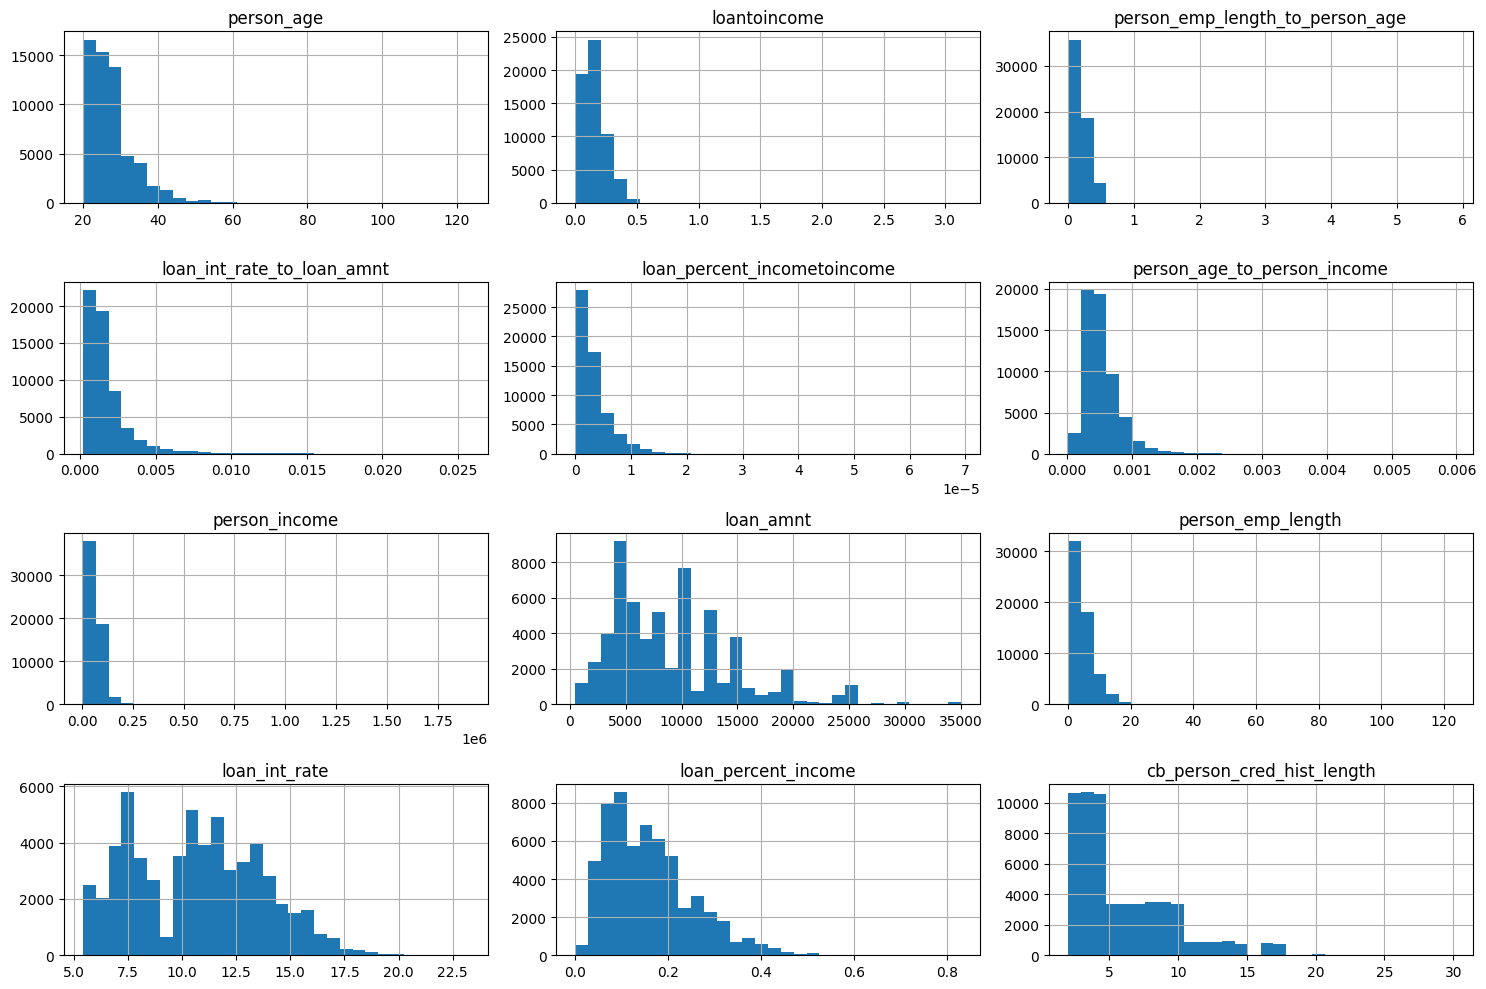

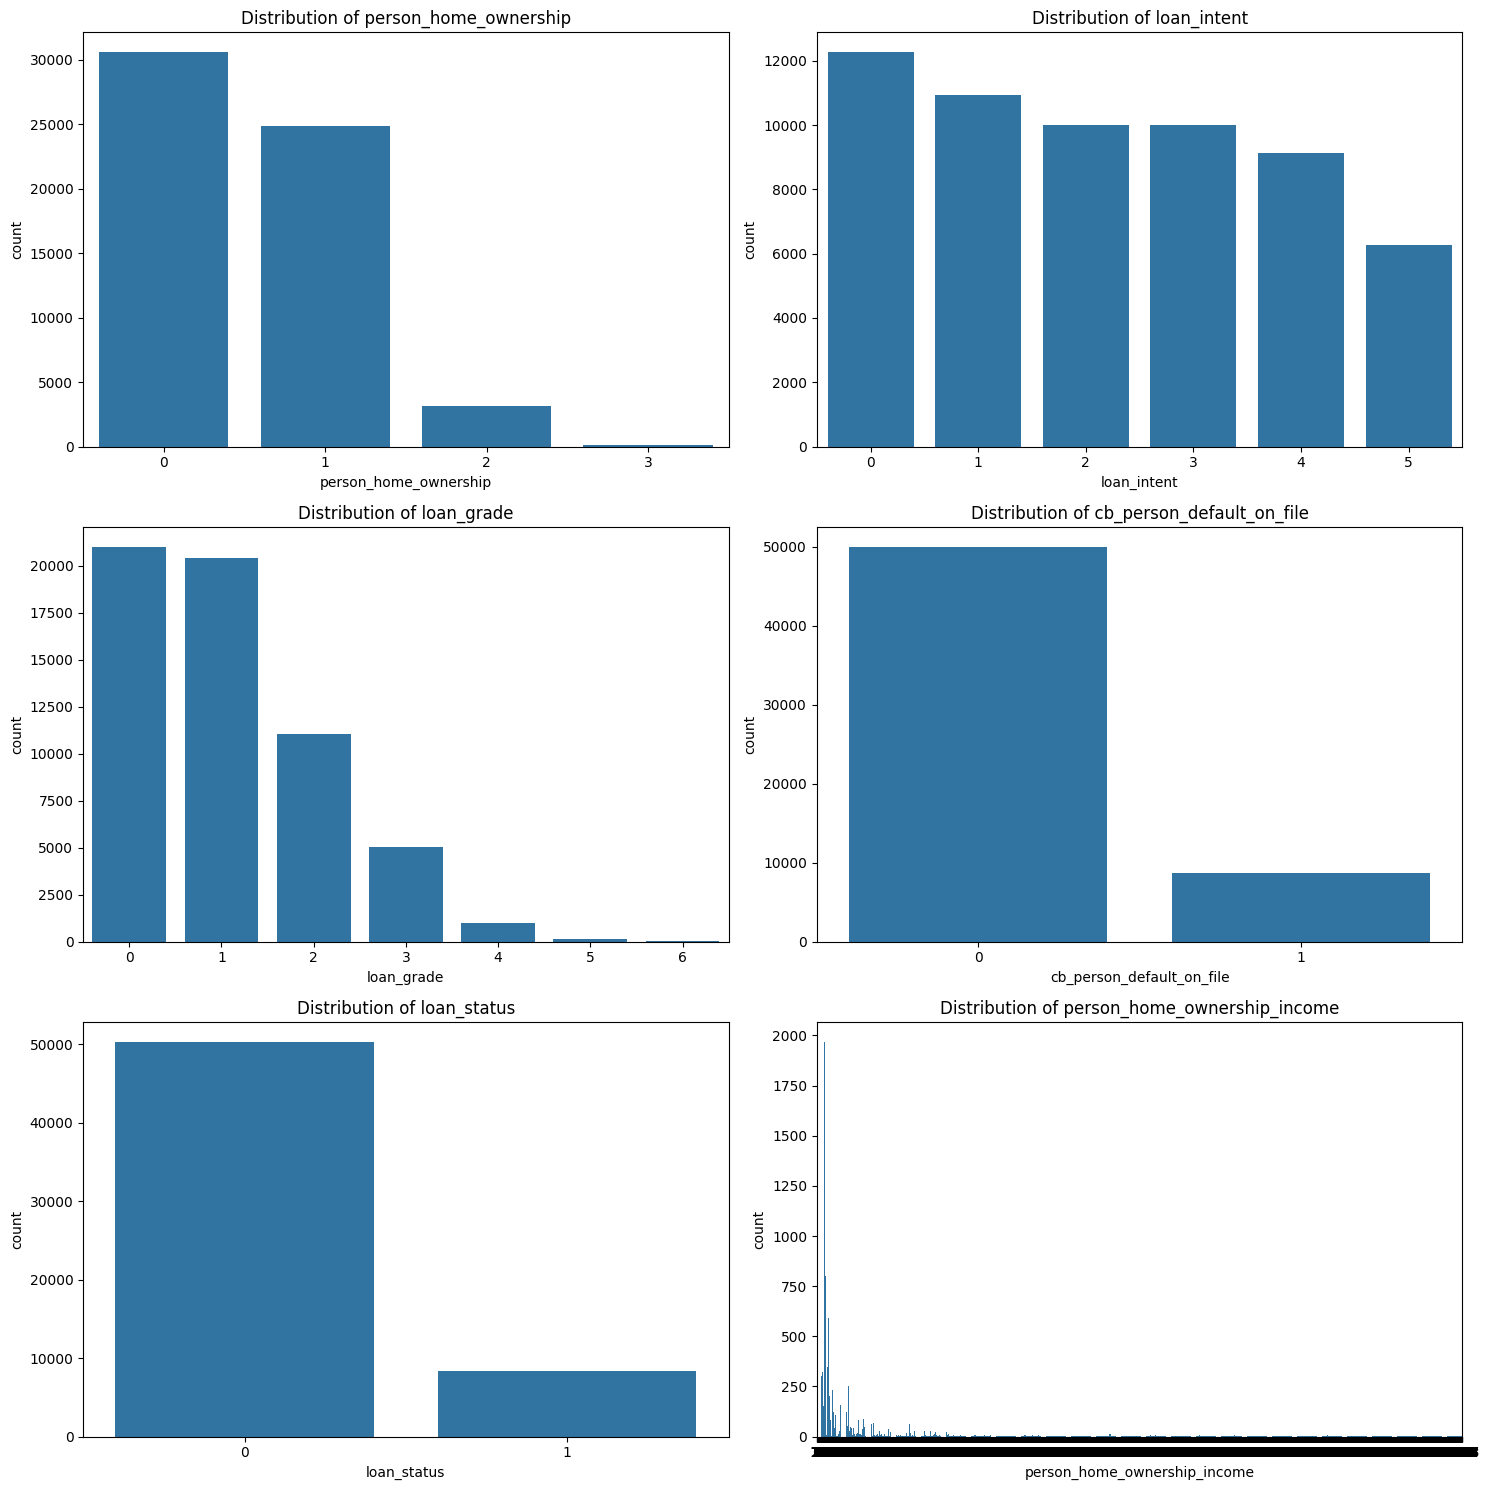

loan_status
0    50295
1     8350
Name: count, dtype: int64
loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64



In [7]:
# train["loantoincome"] = ((train["loan_amnt"] / train["person_income"])).astype('Float64')
# train["loan_percent_incometoincome"] = ((train["loan_percent_income"] / train["person_income"])).astype('Float64')
# train['person_age_to_person_income'] = (train['person_age'] / train['person_income']).astype(str).astype('Float64')
# train['person_emp_length_to_person_age'] = (train['person_emp_length'] / train['person_age']).astype('Float64')
# train['loan_int_rate_to_loan_amnt'] = (train['loan_int_rate'] / train['loan_amnt']).astype('Float64')
# train['person_home_ownership'] = train['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
# train['loan_intent'] = train['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
# train['loan_grade'] = train['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}).astype('category')
# train['cb_person_default_on_file'] = train['cb_person_default_on_file'].replace({'N': 0, 'Y': 1}).astype('category')

# Plot histograms for numerical columns
numerical_columns = ['person_age','loantoincome','person_emp_length_to_person_age',
                     'loan_int_rate_to_loan_amnt','loan_percent_incometoincome',
                     'person_age_to_person_income','person_income', 'loan_amnt',"person_emp_length" ,
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
train[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot count plots for categorical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status',
    "person_home_ownership_income"
]

numerical_features = numerical_columns
categorical_features = categorical_columns
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjusted to 3x2 grid
for ax, col in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=train, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

features = numerical_columns + categorical_columns 
categorical_columns.remove('loan_status')
features.remove('loan_status')
# Define the preprocessing for numerical and categorical features
#print how many 'load_status' 0 and 1 and find the ratio
print(train['loan_status'].value_counts())
print(train['loan_status'].value_counts(normalize=True))

print()


In [8]:
# print(train.head(4))
print(train.shape)
train.head(4)

(58645, 19)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loantoincome,loan_percent_incometoincome,person_age_to_person_income,person_emp_length_to_person_age,loan_int_rate_to_loan_amnt,person_home_ownership_income
0,0,37,35000,0,0.0,0,1,6000,11.49,0.17,0,14,0,0.171429,0.000005,0.001057,0.0,0.001915,0
1,1,22,56000,2,6.0,1,2,4000,13.35,0.07,0,2,0,0.071429,0.000001,0.000393,0.272727,0.003337,1
2,2,29,28800,2,8.0,2,0,6000,8.90,0.21,0,10,0,0.208333,0.000007,0.001007,0.275862,0.001483,2
3,3,30,70000,0,14.0,3,1,12000,11.11,0.17,0,5,0,0.171429,0.000002,0.000429,0.466667,0.000926,3


In [9]:
features

['person_age',
 'loantoincome',
 'person_emp_length_to_person_age',
 'loan_int_rate_to_loan_amnt',
 'loan_percent_incometoincome',
 'person_age_to_person_income',
 'person_income',
 'loan_amnt',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'person_home_ownership_income']

In [10]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

target = ['loan_status']  # Replace with the actual target column name

# Preprocess the data
X = train[features]
y = train[target]
ids = train['id']
testx = test[features]
test_ids = test['id']

X.shape , y.shape , testx.shape,  test_ids.shape

((58645, 17), (58645, 1), (39098, 17), (39098,))

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # ('onehot', OneHotEncoder(handle_unknown='error'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
testx = preprocessor.transform(testx)

# Function to add noise
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Add noise to the numerical features
X_train_noisy = X_train.copy()
X_test_noisy = X_test.copy()
X_train_noisy[:, :len(numerical_features)] = add_noise(X_train[:, :len(numerical_features)])
X_test_noisy[:, :len(numerical_features)] = add_noise(X_test[:, :len(numerical_features)])


X_train_less_noise = X_train.copy()
X_test_less_noise = X_test.copy()
X_train_less_noise[:, :len(numerical_features)] = add_noise(X_train[:, :len(numerical_features)],noise_level=0.001)
X_test_less_noise[:, :len(numerical_features)] = add_noise(X_test[:, :len(numerical_features)],noise_level=0.001)

# Concatenate the original data with the noisy data vertically
X_train_combined = np.vstack((X_train, X_train_noisy, X_train_less_noise))
X_test_combined = np.vstack((X_test, X_test_noisy, X_test_less_noise))

# Concatenate the target variable as well
y_train_combined = np.vstack((y_train, y_train, y_train))
y_test_combined = np.vstack((y_test, y_test,y_test))

# Concatenate the ids as well
ids_train_combined = np.hstack((ids_train, ids_train, ids_train))
ids_test_combined = np.hstack((ids_test, ids_test, ids_test))

# Update the original variables
X_train = X_train_combined
X_test = X_test_combined
y_train = y_train_combined
y_test = y_test_combined
ids_train = ids_train_combined
ids_test = ids_test_combined
xult , yult  , idsult= np.vstack((X_train, X_test)), np.vstack((y_train, y_test)) , np.hstack((ids_train, ids_test))
print(X_train.shape)  # Should output (46916 + 46916, 26)
print(X_test.shape)   # Should output (11729 + 11729, 26)
print(y_train.shape)  # Should output (46916 + 46916, 1)
print(y_test.shape)   # Should output (11729 + 11729, 1)
print(ids_train.shape)  # Should output (46916 + 46916,)
print(ids_test.shape)   # Should output (11729 + 11729,)
print(testx.shape)   # Should output (11729 + 11729,)
print(test_ids.shape)   # Should output (11729 + 11729,)
fmax = 0

(140748, 17)
(35187, 17)
(140748, 1)
(35187, 1)
(140748,)
(35187,)
(39098, 17)
(39098,)


In [12]:
import numpy as np
import pandas as pd

class ensemble:
    def __init__(self):
        self.models = []
        
    def add_model(self, model):
        self.models.append(model)
        
    def predict(self, X_test):
        predictions = []
        for model in self.models:
            pred = model.predict(X_test)
            predictions.append(pred)
            count_greater_than_0_5 = (pred > model.THRESHOLD).sum()
            count_less_than_or_equal_0_5 = (pred <= model.THRESHOLD).sum()
            print(f'Percentage of predictions greater than {model.THRESHOLD}: {count_greater_than_0_5 / len(pred) * 100:.2f}%')
            print(f'Percentage of predictions less than or equal to {model.THRESHOLD}: {count_less_than_or_equal_0_5 / len(pred) * 100:.2f}%')
        
        # Stack predictions to form a 2D array
        stacked_predictions = np.hstack(predictions)
        
        # Average the predictions across models
        y_pred = np.mean(stacked_predictions, axis=1)
        
        # Apply threshold
        y_pred = (y_pred > 0.5).astype(int)
        
        # Flatten the predictions to form a 1D array
        y_pred = y_pred.flatten()
        
        # Assuming test_ids is defined elsewhere in your code
        ids = test_ids
        predictions_df = pd.DataFrame({'id': ids, 'loan_status': y_pred})
        return predictions_df
    
    def save(self, testx, path="ftt.csv"):
        df = self.predict(testx)
        df.to_csv(path, index=False)
        
    def rmamodel(self):
        self.models = []

ens = ensemble()

In [13]:
def ktrain( model , xult , yult,splits=5,epochs=15,batch_size=32,random_state=42):
    global fmax 
    kf = KFold(n_splits=splits, shuffle=True, random_state=random_state)
    losses, aucs, precisions, recalls, f1s, roc_aucs = [], [], [], [], [], []
    for train_index, test_index in kf.split(X):
        xt, xv = xult[train_index], xult[test_index]
        yt, yv = yult[train_index], yult[test_index]
        
        # Initialize and compile the model
        
        # Train the model
        model.fit(xt, yt, epochs=epochs, batch_size=batch_size, verbose=1)
        
        # Evaluate the model
        results = model.evaluate(xv, yv)
        loss, auc, precision, recall = results[0], results[1], results[2], results[3]
        
        # Predict probabilities for the test set
        y_pred_prob = model.predict(xult)
        y_pred = (y_pred_prob > model.THRESHOLD).astype(int)
        
        # Calculate F1 score and ROC AUC score
        f1 = f1_score(yult, y_pred)
        roc_auc = roc_auc_score(yult, y_pred_prob)
        if f1 > fmax:
            fmax = f1
            model.save('best.keras')
            print(colored(f'F1 Score improved to {f1}. Saving model...', 'green','on_red'))
        # Store metrics
        losses.append(loss)
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        roc_aucs.append(roc_auc)
    print('losses: ', losses)
    print('aucs: ', aucs)
    print('precisions: ', precisions)
    print('recalls: ', recalls)
    print('f1s: ', f1s)
    print('roc_aucs: ', roc_aucs)
    print(f'Average Loss: {sum(losses) / len(losses)}')
    print(f'Average AUC: {sum(aucs) / len(aucs)}')
    print(f'Average Precision: {sum(precisions) / len(precisions)}')
    print(f'Average Recall: {sum(recalls) / len(recalls)}')
    print(f'Average F1 Score: {sum(f1s) / len(f1s)}')
    print(f'Average ROC AUC Score: {sum(roc_aucs) / len(roc_aucs)}')



In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, Input
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from colorama import init
from termcolor import colored
# Define the L2 regularizers


k = .0001
kernel_regularizer = l2(0.0001*k)
bias_regularizer = l2(0.00001*k)

# Define the CNN model with different regularization strengths for kernel and bias
class AutoencoderModel:
    def __init__(self, input_dim, encoding_dim=512):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self.build_model()
        self.THRESHOLD = 0.5
    def build_model(self):
        # Encoder
        input_layer = Input(shape=(self.input_dim,))
        encoded = Dense(self.encoding_dim, activation='relu')(input_layer)
        encoded = Dense(self.encoding_dim // 2, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 4, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 8, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 16, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 32, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
    
        # Decoder
        decoded = Dense(self.encoding_dim // 32, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        decoded = Dense(self.encoding_dim // 16, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        decoded = Dense(self.encoding_dim // 8, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(encoded)
        decoded = Dense(self.encoding_dim // 4, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(decoded)
        decoded = Dense(self.encoding_dim // 2, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(decoded)
        decoded = Dense(1, activation='sigmoid')(decoded)
    
        # Autoencoder
        autoencoder = Model(input_layer, decoded)
    
        # Compile the model with Binary Crossentropy loss
        autoencoder.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[AUC(), Precision(), Recall()])    
        return autoencoder

    def fit(self, X_train, y_train, epochs=10, verbose=0, batch_size=32, validation_split=0.3, validation_data=None):
        if validation_data is not None:
            self.autoencoder.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=validation_data, validation_split=validation_split)
            return 
        self.autoencoder.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X_test):
        return self.autoencoder.predict(X_test)

    def summary(self):
        self.autoencoder.summary()

    def evaluate(self, X_test, y_test):
        return self.autoencoder.evaluate(X_test, y_test)
    def save(self, path):
        self.autoencoder.save(path)


automodel = AutoencoderModel(input_dim=xult.shape[1])
ktrain(automodel, xult, yult,epochs=1,batch_size=32,splits=2,random_state=42)
ens.add_model(automodel)


642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.6224 - loss: 0.4608 - precision: 0.1659 - recall: 0.0121 - val_auc: 0.8820 - val_loss: 0.3017 - val_precision: 0.5636 - val_recall: 0.5901
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8778 - loss: 0.3032 - precision: 0.5638 - recall: 0.5857
5498/5498 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step
F1 Score improved to 0.5796778481507545. Saving model...
642/642 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 0.8359 - loss: 0.3059 - precision: 0.7047 - recall: 0.3017 - val_auc: 0.8263 - val_loss: 0.3901 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8223 - loss: 0.3957 - precision: 0.0000e+00 - recall: 0.0000e+00
5498/5498 ━━━━━━━━━━━━━━━━━━━━ 5s 900us/step
losses:  [0.307430624961853, 0.38634753227233887]
aucs:  [0.8769336938858032, 0.8272091150283813]
precisions:  [0.5684772729873657, 0.0]
recalls:  [0.5882776975631714, 0.0]
f1s:  [0.5796778481507545, 0.0]
roc_aucs:  [0.8796695859035812, 0.826416

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from colorama import init
from termcolor import colored

# Define the L2 regularizers
k = .0001
kernel_regularizer = l2(0.0001*k)
bias_regularizer = l2(0.00001*k)

# Define the Dense model with different regularization strengths for kernel and bias
class DenseModel:
    def __init__(self, input_dim, hidden_dim=64):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.model = self.build_model()
        self.THRESHOLD = 0.5

    def build_model(self):
        input_layer = Input(shape=(self.input_dim,))
        x = Dense(self.hidden_dim, activation='relu')(input_layer)
        x = Dense(self.hidden_dim // 2, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(x)
        x = Dense(self.hidden_dim // 4, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(x)
        x = Dense(self.hidden_dim // 8, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(x)
        x = Dense(self.hidden_dim // 16, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(x)
        x = Dense(self.hidden_dim // 32, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)(x)
        output_layer = Dense(1, activation='sigmoid')(x)

        model = Model(input_layer, output_layer)

        # Compile the model with Binary Crossentropy loss
        model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[AUC(), Precision(), Recall()])
        return model

    def fit(self, X_train, y_train, epochs=10, verbose=0, batch_size=32, validation_split=0.3, validation_data=None):
        if validation_data is not None:
            self.model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=validation_data, validation_split=validation_split)
            return 
        self.model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def summary(self):
        self.model.summary()

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def save(self, path):
        self.model.save(path)

# Example usage
# Assuming xult and yult are your feature matrix and target vector
dense_model = DenseModel(input_dim=xult.shape[1])
ktrain(dense_model, xult, yult,epochs=1,batch_size=32,splits=2,random_state=37)
# tt = dense_model.predict(testx)
# tt.shape
ens.add_model(dense_model)

642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc_1: 0.5593 - loss: 0.8859 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_auc_1: 0.7628 - val_loss: 0.3478 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - auc_1: 0.7588 - loss: 0.3502 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
5498/5498 ━━━━━━━━━━━━━━━━━━━━ 4s 647us/step
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_1: 0.7752 - loss: 0.3460 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_auc_1: 0.8223 - val_loss: 0.3221 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - auc_1: 0.8218 - loss: 0.3187 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
5498/5498 ━━━━━━━━━━━━━━━━━━━━ 4s 646us/step
losses:  [0.34808892011642456, 0.3234791159629822]
aucs:  [0.7605764865875244, 0.822157084941864]
precisions:  [0.0, 0.0]
recalls:  [0.0, 0.0]
f1s:  [0.0, 0.0]
roc_aucs:  [0.7604548556728872, 0.8261344330591891]
Average Loss: 0.33

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

class XGBoostClassifierModel:
    def __init__(self, **kwargs):
        self.model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', **kwargs)
        self.THRESHOLD = 0.5

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train,verbose=True)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, self.predict_proba(X_test))
        cm = confusion_matrix(y_test, y_pred)
        return {'accuracy': accuracy, 'f1_score': f1, 'roc_auc': auc, 'confusion_matrix': cm}

    def summary(self):
        print(self.model)

    def save(self, path):
        self.model.save_model(path)

# Example usage
# Assuming xult and yult are your feature matrix and target vector
# Split the data into training and test sets

# Initialize the XGBoost classifier model
xgb_model = XGBoostClassifierModel()

# Fit the model on training data
xgb_model.fit(xult, yult)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate other metrics
evaluation_results = xgb_model.evaluate(X_test, y_test)
print(f"F1 Score: {evaluation_results['f1_score']:.2f}")
print(f"ROC AUC: {evaluation_results['roc_auc']:.2f}")
print(f"Confusion Matrix:\n{evaluation_results['confusion_matrix']}")

In [93]:
# ens.save(testx)

  63/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step
Percentage of predictions greater than 0.5: 0.00%
Percentage of predictions less than or equal to 0.5: 100.00%
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step
Percentage of predictions greater than 0.5: 0.00%
Percentage of predictions less than or equal to 0.5: 100.00%
